In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/marketing_data.csv


In [2]:
#load data set
data = pd.read_csv("../input/marketing-data/marketing_data.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
#clean up column names that contain whitespace
data.columns = data.columns.str.replace(' ', '')
#data.info()

#trasform income column to a numerical
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',','').astype('float')
#data.info()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Exploratory Data Analysis

In [5]:
#identify null values 
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


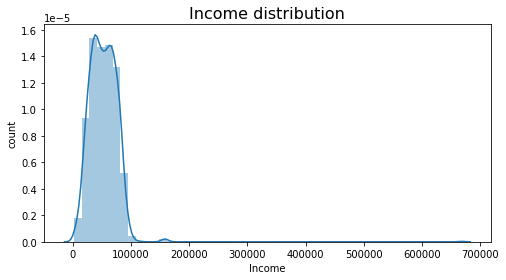

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(data['Income'], kde=True, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');


In [7]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:>

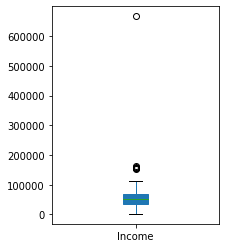

In [8]:
data['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

Indentify features container outliers
likely indicate data entry errors are Year_Birth <= 1900

In [9]:
#select columns to plot
data_to_plot = data.drop(columns = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

In [10]:
data_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


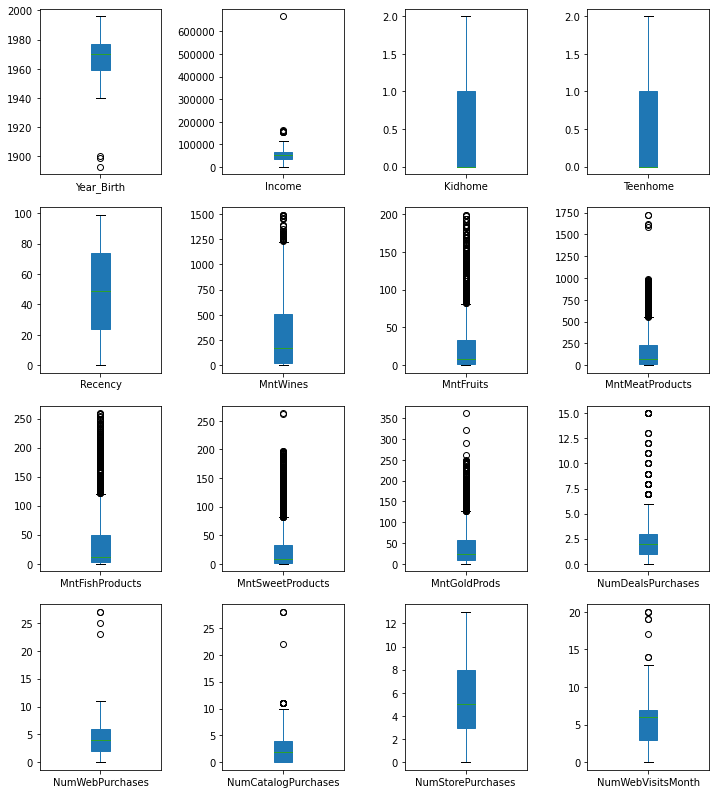

In [11]:
#subplots
data_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Remove rows where Year_Birth <= 1900:

<AxesSubplot:>

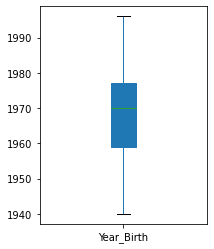

In [12]:
data = data[data['Year_Birth']>1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
data['Year_Birth'].plot(kind='box', patch_artist=True)

are there any variables that warrant transformations?

In [13]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


The Dt_Customer column should be transformed to datetime format

In [14]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

#data['Dt_Customer'].head()

In [16]:
list(data.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

manipulation feature
Review a list of the feature names below, from which we can engineer:
* The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
* The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
* The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
* The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
* The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [31]:
#Dependents
data['Dependents'] = data['Kidhome'] + data['Teenhome']

#Year becoming  a Customer
data['Year_Customer'] = pd.DatetimeIndex(data['Dt_Customer']).year

#Total amount spent
mnt_cols = [col for col in data.columns if 'Mnt' in col]

data['TotalMnt'] = data[mnt_cols].sum(axis=1)

#totoal Purchases
purchases_cols = [col for col in data.columns if  'Purchases' in col]
data['TotalPurchases'] = data[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in data.columns if 'Cmp' in col] + ['Response']
data['TotalCampaignsAcc'] = data[campaigns_cols].sum(axis=1)

# view new features, by customer ID
data[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,3570.0,30,1
1,1,0,2014,1731.0,36,2
2,10476,1,2014,753.0,22,0
3,1386,2,2014,33.0,8,0
4,5371,1,2014,273.0,16,2


In [29]:
print(data[mnt_cols])

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          189        104              379              111               189   
1          464          5               64                7                 0   
2          134         11               59               15                 2   
3           10          0                1                0                 0   
4            6         16               24               11                 0   
...        ...        ...              ...              ...               ...   
2232       372         18              126               47                48   
2233         5         10               13                3                 8   
2234       185          2               88               15                 5   
2235       267         38              701              149               165   
2236       169         24              553              188                 0   

      MntGoldProds  TotalMn